In [23]:
def dist(point_a, point_b):
    return ((point_a[0] - point_b[0]) ** 2 + (point_a[1] - point_b[1]) ** 2)**.5

gen_circle = []

center_x = 10
center_y = 10
radius = 5

for i in range(center_x-radius, center_x+radius):
    for j in range(center_y-radius, center_y+radius):
        if dist((i, j), (center_x, center_y)) <= radius:
            gen_circle.append((i, j))

print(gen_circle)

[(5, 10), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10), (11, 11), (11, 12), (11, 13), (11, 14), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (12, 11), (12, 12), (12, 13), (12, 14), (13, 6), (13, 7), (13, 8), (13, 9), (13, 10), (13, 11), (13, 12), (13, 13), (13, 14), (14, 7), (14, 8), (14, 9), (14, 10), (14, 11), (14, 12), (14, 13)]


In [24]:
def convex_hull(points):
    """Computes the convex hull of a set of 2D points.

    Input: an iterable sequence of (x, y) pairs representing the points.
    Output: a list of vertices of the convex hull in counter-clockwise order,
      starting from the vertex with the lexicographically smallest coordinates.
    Implements Andrew's monotone chain algorithm. O(n log n) complexity.
    """

    # Sort the points lexicographically (tuples are compared lexicographically).
    # Remove duplicates to detect the case we have just one unique point.
    points = sorted(set(points))

    # Boring case: no points or a single point, possibly repeated multiple times.
    if len(points) <= 1:
        return points

    # 2D cross product of OA and OB vectors, i.e. z-component of their 3D cross product.
    # Returns a positive value, if OAB makes a counter-clockwise turn,
    # negative for clockwise turn, and zero if the points are collinear.
    def cross(o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

    # Build lower hull 
    lower = []
    for p in points:
        while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(p)

    # Build upper hull
    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(p)

    # Concatenation of the lower and upper hulls gives the convex hull.
    # Last point of each list is omitted because it is repeated at the beginning of the other list. 
    return lower[:-1] + upper[:-1]

# Example: convex hull of a 10-by-10 grid.
assert convex_hull([(i//10, i%10) for i in range(100)]) == [(0, 0), (9, 0), (9, 9), (0, 9)]

points = [(2, 2), (3, 3), (4, 4), (2, 2.5), (2.25, 2.3)]
points = gen_circle
points_hull = convex_hull(points)

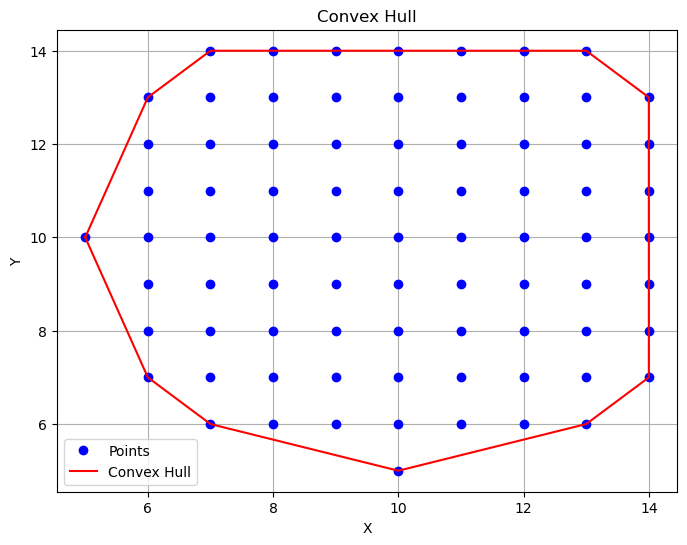

In [25]:
import matplotlib.pyplot as plt

def plot_points(points, convex_hull):
    """
    Plot the points and the convex hull.
    """
    # Extract x and y coordinates of points and convex hull
    points_x = [point[0] for point in points]
    points_y = [point[1] for point in points]

    convex_hull_x = [point[0] for point in convex_hull]
    convex_hull_y = [point[1] for point in convex_hull]

    # Plot points and convex hull
    plt.figure(figsize=(8, 6))
    plt.plot(points_x, points_y, 'bo', label='Points')
    plt.plot(convex_hull_x + [convex_hull_x[0]], convex_hull_y + [convex_hull_y[0]], 'r-', label='Convex Hull')
    plt.title('Convex Hull')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_points(points, points_hull)